In [21]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [22]:
#Define any constants used
kB = 1.38 * 10**(-23)

In [23]:
#Choose a temperature
T = 50 #K

In [24]:
#define inverse cumulative distribution function (icdf) for boltzmann dist
# p(E) = e^(-E/kT)/'Z1
#'Z1 is kT
def icdf(u):
    return -kB*T*sp.log(1-u)

In [25]:
#Generates a number, n, of random energies based on above icdf
def rand_E(n):
    return icdf(sp.stats.uniform.rvs(size=n))

In [31]:
#Defining initial conditions and parameters for harmonic oscillator system
E_0 = rand_E(1) #random energy generated from boltzmann dist
print(E_0)
k0 = 0.05
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_0/k0)**(1/2) * sp.cos(phi)
v0 = (2*E_0/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print((2*E_0/k0)**(1/2), (2*E_0/m)**(1/2))
print(u0)

[  1.23559148e-21]
[  2.22314325e-10] [  3.51509812e-11]
[  1.55466122e-10  -2.51266512e-11]


In [27]:
def k(t):
    k = k0
    return k

In [32]:
#Defining equation for SHM in system of equations
#Note switched so that these are not dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-(k(t)/m)*x)

In [37]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
tf = 200
tn = 2001
dt = tf/(tn-1)
t = sp.linspace(0,tf,tn)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


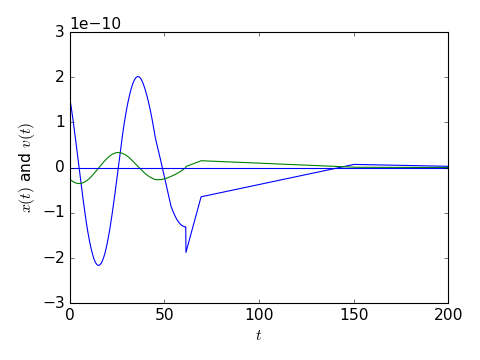

In [38]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [39]:
#Check to make sure equal to u0
print([sp.amax(x),sp.amax(v)])

[2.0158964498261938e-10, 3.3486597199677496e-11]


In [42]:
#Calculating energy at each time step
for i in range (0,tn):
    Energy = 1/2*m*v[i]**2 + 1/2*k(i+dt)*x[i]**2
    print(Energy)

1.23559147674e-21
1.23559147768e-21
1.235591479e-21
1.23559147932e-21
1.23559178667e-21
1.23559555566e-21
1.23560174032e-21
1.23560835359e-21
1.2356138675e-21
1.23561721316e-21
1.23561778075e-21
1.23561541956e-21
1.23561043794e-21
1.23560360331e-21
1.23559614219e-21
1.23558974017e-21
1.23558654198e-21
1.23558796261e-21
1.23559217492e-21
1.23559710329e-21
1.23560113094e-21
1.23560309995e-21
1.2356023113e-21
1.23559852482e-21
1.23559195921e-21
1.23558329203e-21
1.23557365974e-21
1.23556465764e-21
1.2355583399e-21
1.23555663247e-21
1.23555828154e-21
1.23556114034e-21
1.23556351914e-21
1.23556418664e-21
1.23556237003e-21
1.23555775491e-21
1.23555048535e-21
1.23554116388e-21
1.23553085145e-21
1.23552106749e-21
1.23551378985e-21
1.23552563397e-21
1.23559216009e-21
1.23570651403e-21
1.23585987685e-21
1.23604385292e-21
1.23625046986e-21
1.23647217862e-21
1.23670185342e-21
1.23693279176e-21
1.23715871445e-21
1.23737376557e-21
1.23757251249e-21
1.23774994589e-21
1.2379014797e-21
1.23802295118e-2